In [1]:
#importing python modules/libraries
import pandas as pd
import numpy as nump
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_excel(r"C:\Users\aviv\Desktop\python learning\Suicide_Statistics.xlsx", index_col=0)


age
15-24 years     975700
25-34 years    1360780
35-54 years    2887740
5-14 years       62320
55-74 years    1955150
75+ years       756777
Name: suicides_no, dtype: int64


<AxesSubplot:title={'center':'Agewise comparison'}, xlabel='age'>

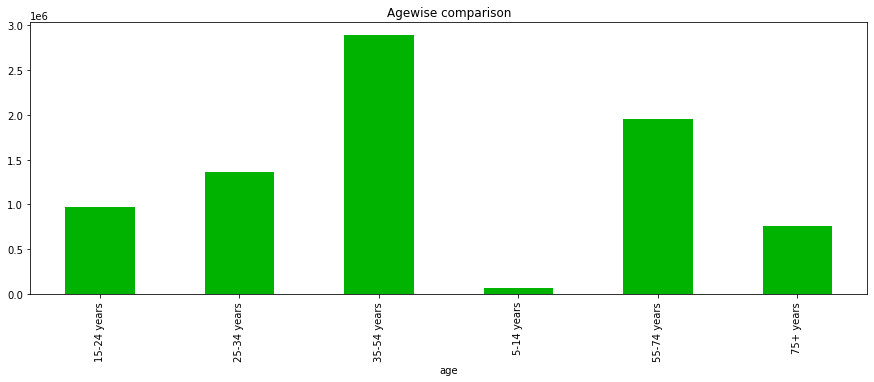

In [3]:
#Age wise Comparison
print(df.groupby('age')['suicides_no'].sum())
myColors=['#00b300']
df.groupby('age')['suicides_no'].sum().sort_index().plot.bar(figsize=(15,5),title = "Agewise comparison",color=myColors)

sex
female    1894294
male      6104173
Name: suicides_no, dtype: int64


<AxesSubplot:title={'center':'Male/Female'}, xlabel='sex'>

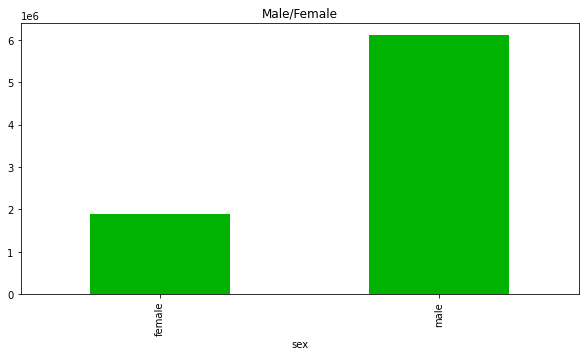

In [4]:
#male vs female suicide comparison
print(df.groupby('sex')['suicides_no'].sum())
df.groupby('sex')['suicides_no'].sum().plot.bar(figsize=(10,5),title = "Male/Female",color=myColors)


<AxesSubplot:xlabel='country'>

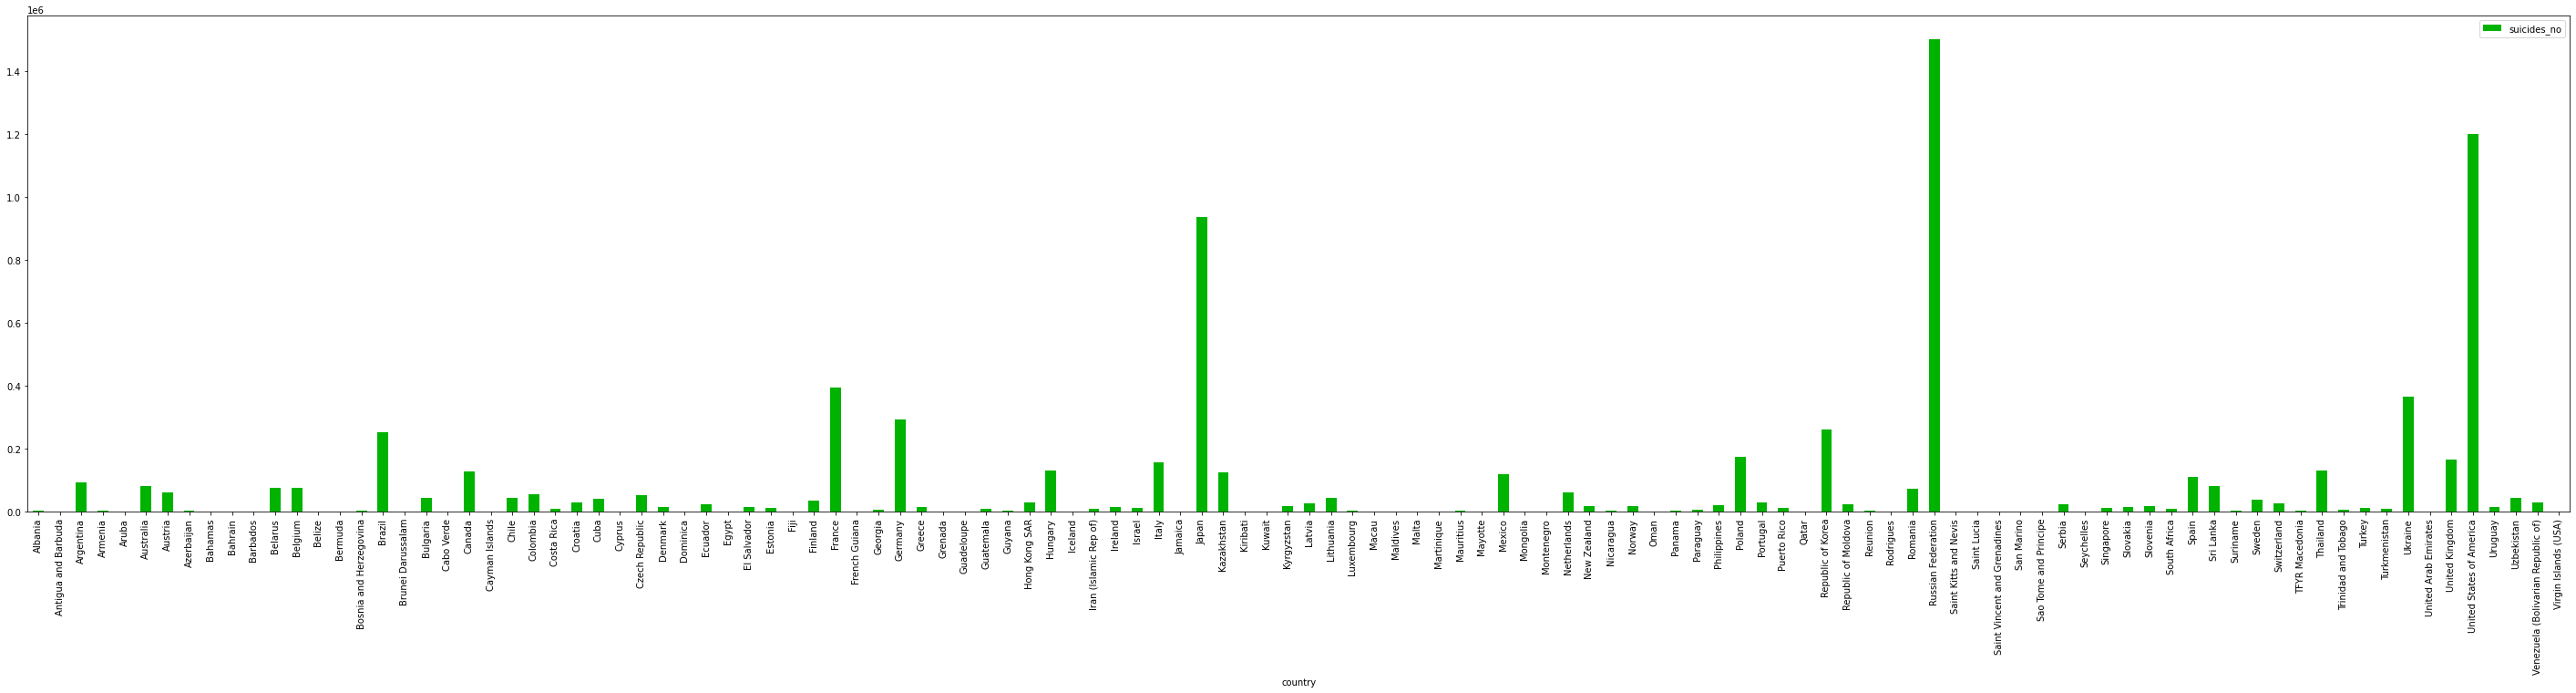

In [5]:
df[['country','suicides_no']].groupby(['country']).sum().plot(kind='bar',figsize=(50,10),label="Total Suicies Per country in following Year",color=myColors)

<AxesSubplot:title={'center':'Top 5 countries with highest Suicide Rate'}, xlabel='country'>

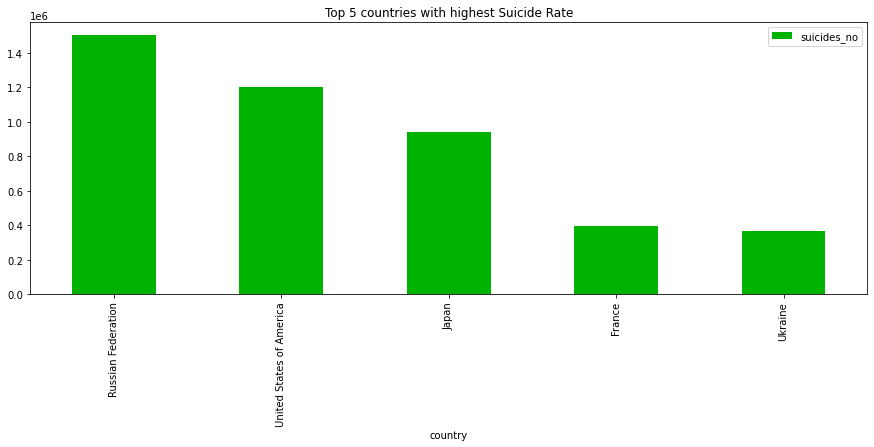

In [20]:
#checking top 5 countries highest suicide rate.
c_suicides=df[['country','suicides_no']].groupby(['country']).sum()
c_suicides = c_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top_5 = c_suicides[:5]
top_5.plot(kind='bar',figsize=(15,5),title="Top 5 countries with highest Suicide Rate",x='country',y='suicides_no',color=myColors)

<AxesSubplot:title={'center':'Suicide Rate'}, xlabel='year'>

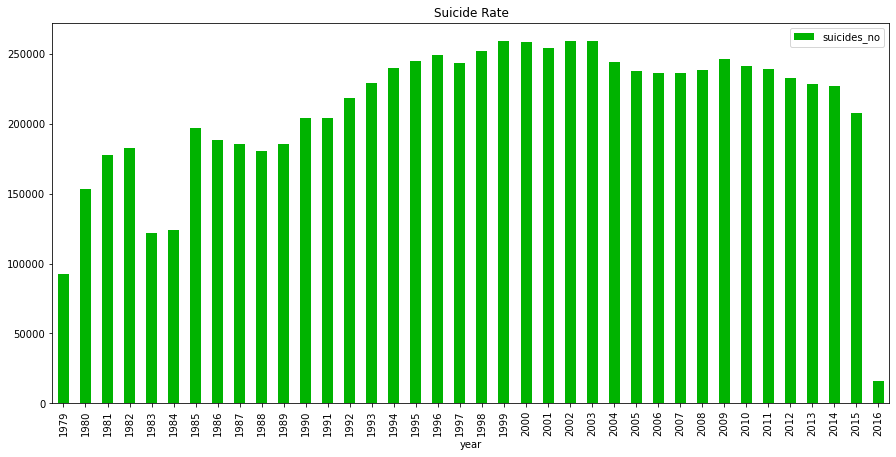

In [7]:
#Checking total number of suicides per year
df[['year','suicides_no']].groupby(['year']).sum().plot(kind='bar',figsize=(15,7),title="Suicide Rate",color=myColors)

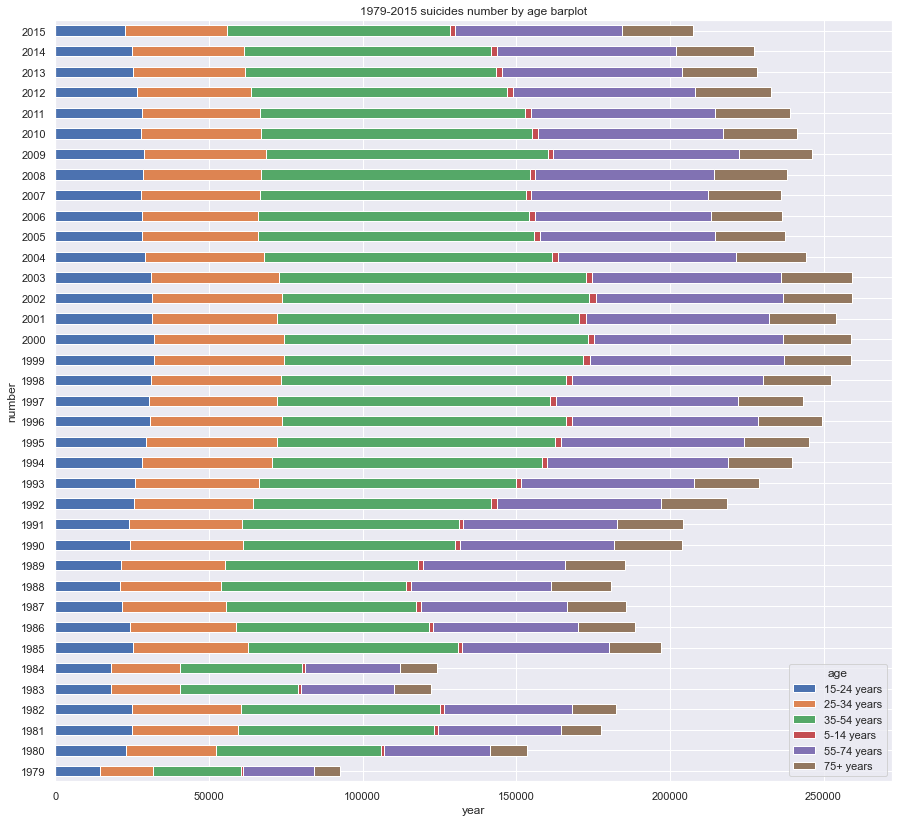

In [10]:
agePivot=pd.pivot_table(df,index='year',columns='age',values='suicides_no',aggfunc=nump.sum)
agePivot.tail()
agePivot.drop(index=2016,inplace=True)
agePivot.tail()
sns.set()
p3=agePivot.plot.barh(figsize=(15,14),stacked=True)
p3.get_figure()
plt.title(r'1979-2015 suicides number by age barplot')
plt.xlabel('year')
plt.ylabel('number')
plt.savefig('./total_by_age_barh.png')
plt.show()

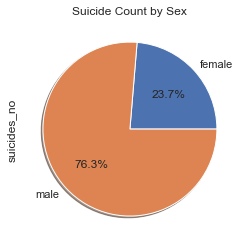

In [19]:
import seaborn as sns
sns.set()
suicide_numbers_by_sex = df['suicides_no'].dropna().groupby(df['sex']).sum() / 1000000
suicide_numbers_by_sex.plot(kind='pie', title="Suicide Count by Sex", shadow=True, autopct='%1.1f%%');